# Sara Park

## Research Question


##### **Does ease of online booking, online boarding, and online support affect flight satisfaction and if so, does age and travel type matter?**


### Research question/interests

My research interests are psychology - behavioral mostly. As we have a group member in business, we combined our ideas for the topic of psychology in marketing. 

In [90]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [91]:
dta = pd.read_csv("../data/raw/Invistico_Airline.csv")

Data Analysis Plan:


I plan on subsetting the satisfaction, online boarding, ease of online booking, and age columns from the dataset to determine if there is a trend between whether the customer's satisfaction is affected by the level of ease in booking flight tickets online and ability to board online. First I will clean the data to ensure neither of the factors contain NA or null. The determination of the ease of online booking and online boarding uses a scale of 0 to 5, where 0 is not accessible and 5 is very accessible. To use Pearson's r to find the correlation of the variables, it will be easier for me to convert all variables into a numerical values to separate between satisfied and disatified customers and analyze the scores between the ease of online booking scores, online boarding, age, and travel type of customers.

# Exploratory Data Analysis

In [92]:
dta.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [93]:
dta = dta[['satisfaction','Ease of Online booking','Online boarding', 'Online support', 'Age','Type of Travel']].dropna()
dta.describe().T
# mean = booking: 3.472105; boarding: 3.352587; age: 39.427957
# std = booking: 1.30556; boarding: 1.298715; age: 15.119460

,count,mean,std,min,25%,50%,75%,max
Ease of Online booking,129880.0,3.472105,1.305560,0.0,2.0,4.0,5.0,5.0
Online boarding,129880.0,3.352587,1.298715,0.0,2.0,4.0,4.0,5.0
Online support,129880.0,3.519703,1.306511,0.0,3.0,4.0,5.0,5.0
Age,129880.0,39.427957,15.119360,7.0,27.0,40.0,51.0,85.0


In [94]:
dta.describe(exclude=[np.number]).T
# 71087/129880 = 0.54738303
# = 55% Satisfaction
# 89693/129880 = 0.69058362
# = 69% Business travel 

,count,unique,top,freq
satisfaction,129880,2,satisfied,71087
Type of Travel,129880,2,Business travel,89693


In [95]:
satisfied = dta.loc[dta['satisfaction'] == 'satisfied'].mean()
print(satisfied)    # booking: 3.984751; boarding: 3.751966; support: 3.983260; age: 41.050051;

dissatisfied = dta.loc[dta['satisfaction'] == 'dissatisfied'].mean()
print(dissatisfied)     #booking: 2.852261; boarding: 2.869695; suport: 2.959213; age: 37.466671

C:\Users\sarap.sara\AppData\Local\Temp\ipykernel_13128\610772415.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  satisfied = dta.loc[dta['satisfaction'] == 'satisfied'].mean()


Ease of Online booking     3.984751
Online boarding            3.751966
Online support             3.983260
Age                       41.050051
dtype: float64
Ease of Online booking     2.852261
Online boarding            2.869695
Online support             2.959213
Age                       37.466671
dtype: float64


C:\Users\sarap.sara\AppData\Local\Temp\ipykernel_13128\610772415.py:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  dissatisfied = dta.loc[dta['satisfaction'] == 'dissatisfied'].mean()


# Exploratory Data Analysis (EDA)

In [96]:
print(dta.head())
print(dta.describe())


  satisfaction  Ease of Online booking  Online boarding  Online support  Age  \
0    satisfied                       3                2               2   65   
1    satisfied                       3                2               2   47   
2    satisfied                       2                2               2   15   
3    satisfied                       1                3               3   60   
4    satisfied                       2                5               4   70   

    Type of Travel  
0  Personal Travel  
1  Personal Travel  
2  Personal Travel  
3  Personal Travel  
4  Personal Travel  
       Ease of Online booking  Online boarding  Online support            Age
count           129880.000000    129880.000000   129880.000000  129880.000000
mean                 3.472105         3.352587        3.519703      39.427957
std                  1.305560         1.298715        1.306511      15.119360
min                  0.000000         0.000000        0.000000       7.000000
25%

<AxesSubplot:xlabel='Ease of Online booking', ylabel='count'>

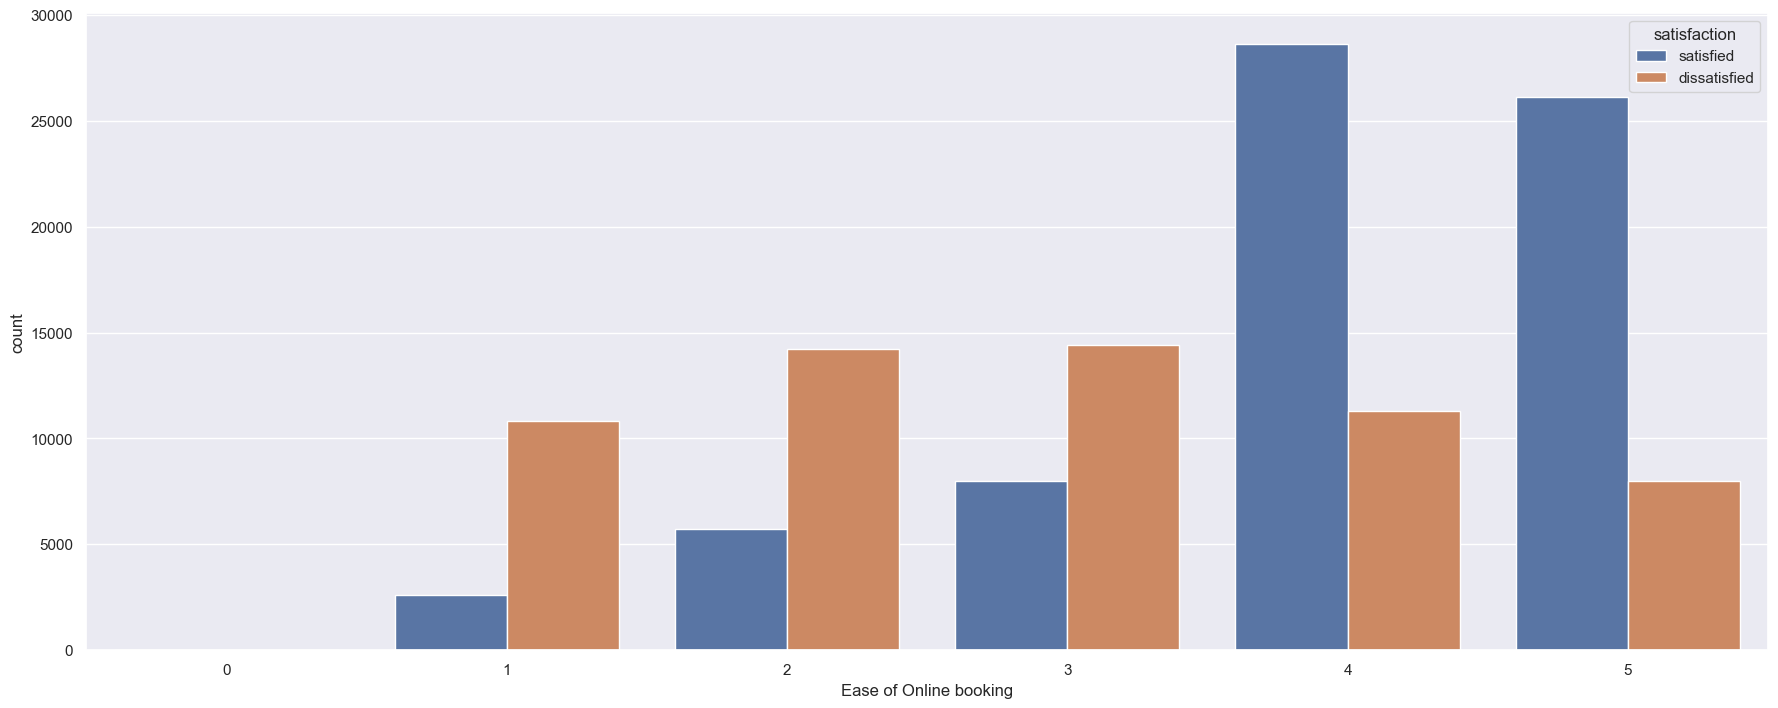

In [97]:
# Online booking scores between satifacted and dissatisfied customers
sns.countplot(dta, x='Ease of Online booking', hue ='satisfaction')
#scatter plot, point plot, bar plot

<AxesSubplot:xlabel='Online boarding', ylabel='count'>

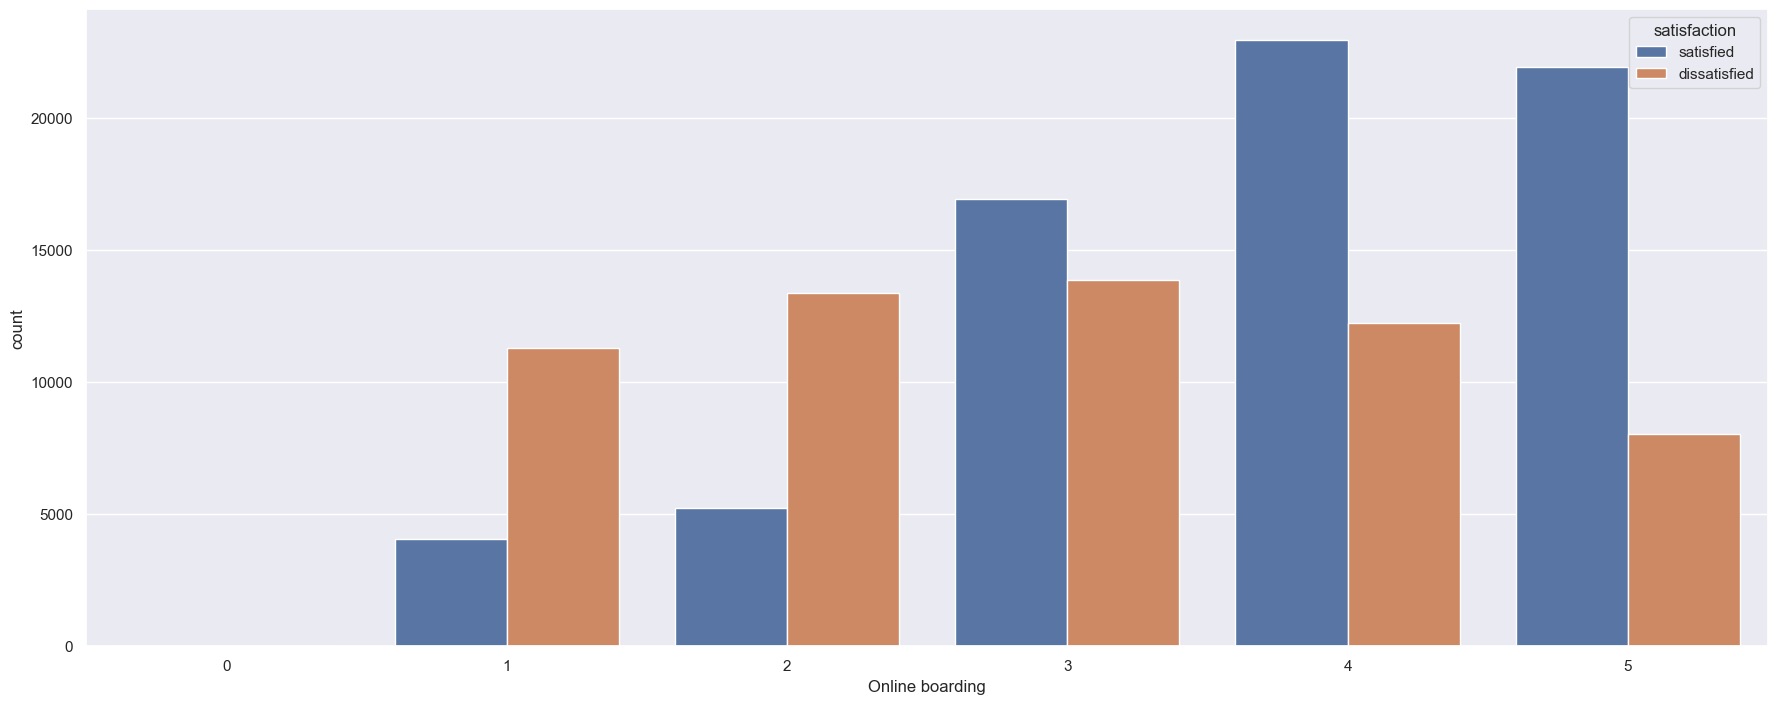

In [98]:
# Ease of online boarding scores between satifacted and dissatisfied customers
sns.countplot(dta, x='Online boarding', hue ='satisfaction')

<AxesSubplot:xlabel='Online support', ylabel='count'>

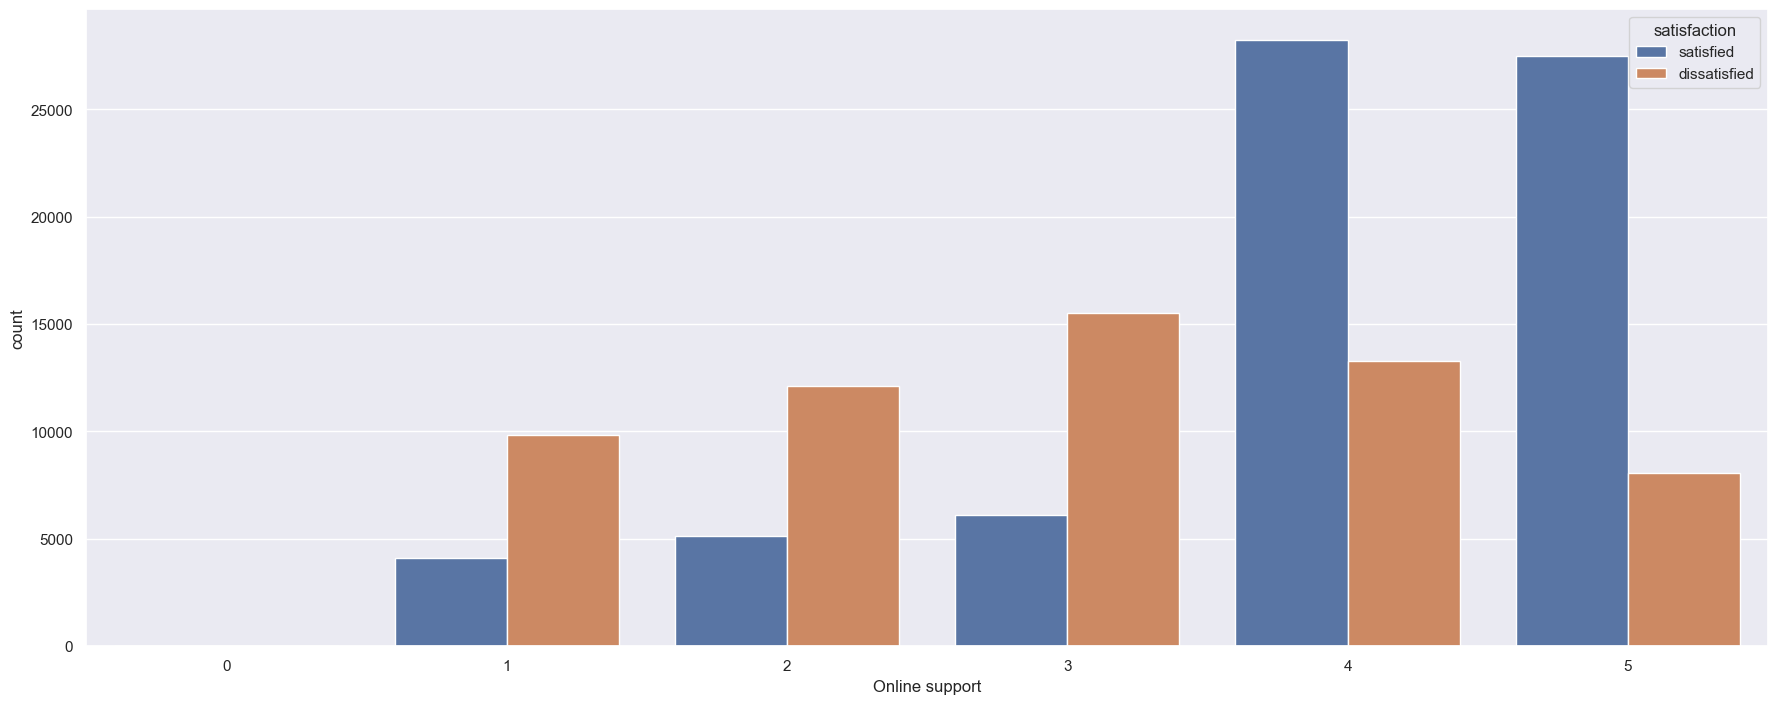

In [99]:
# Online support scores between satifacted and dissatisfied customers
sns.countplot(dta, x='Online support', hue ='satisfaction')

<AxesSubplot:xlabel='Ease of Online booking', ylabel='count'>

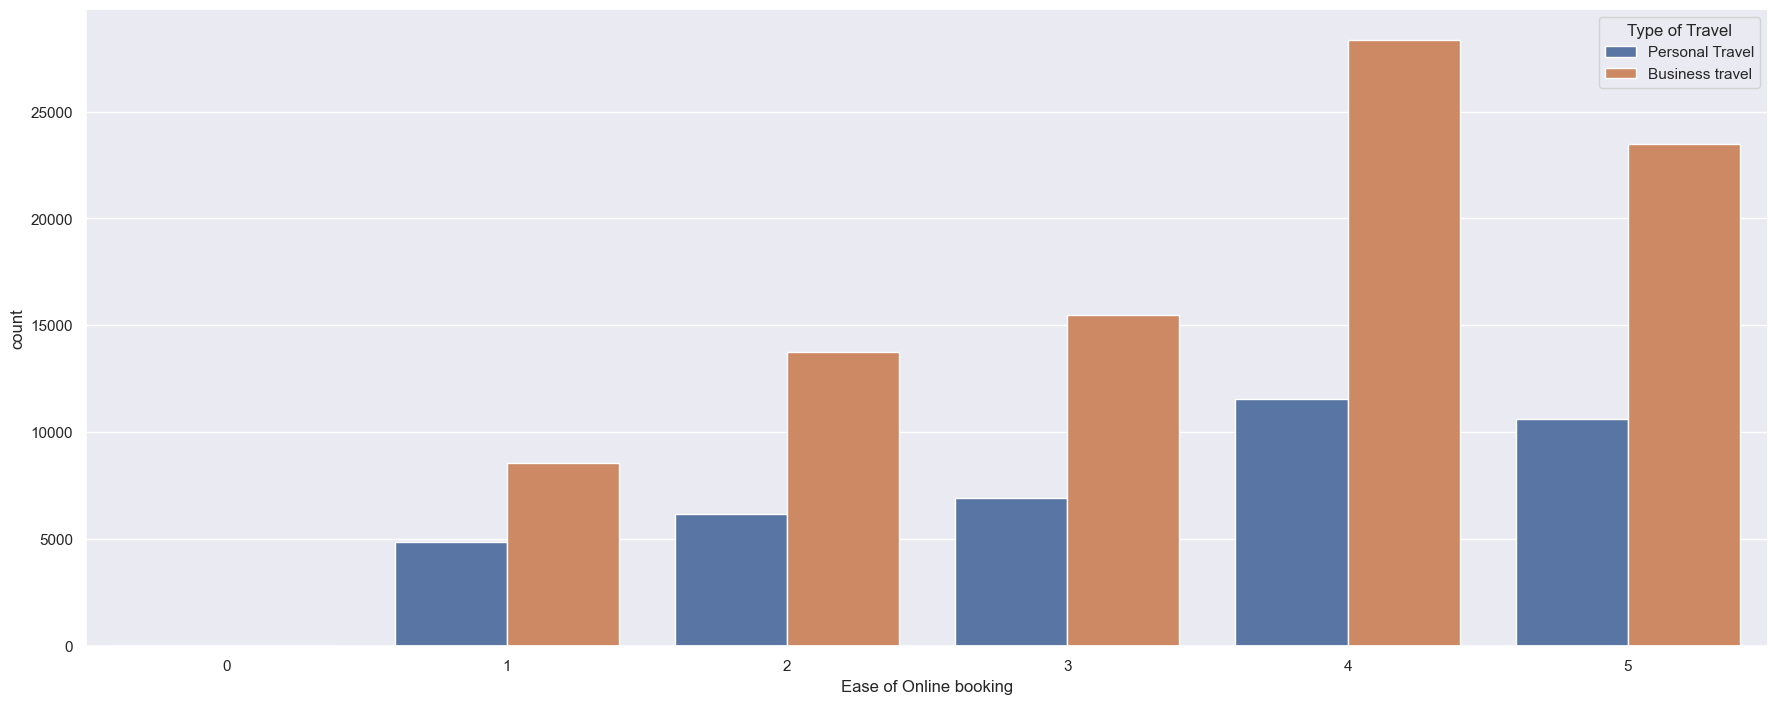

In [100]:
# Ease of Online booking score between personal and business travellers 
sns.countplot(dta, x='Ease of Online booking', hue ='Type of Travel')

<AxesSubplot:xlabel='Age', ylabel='count'>

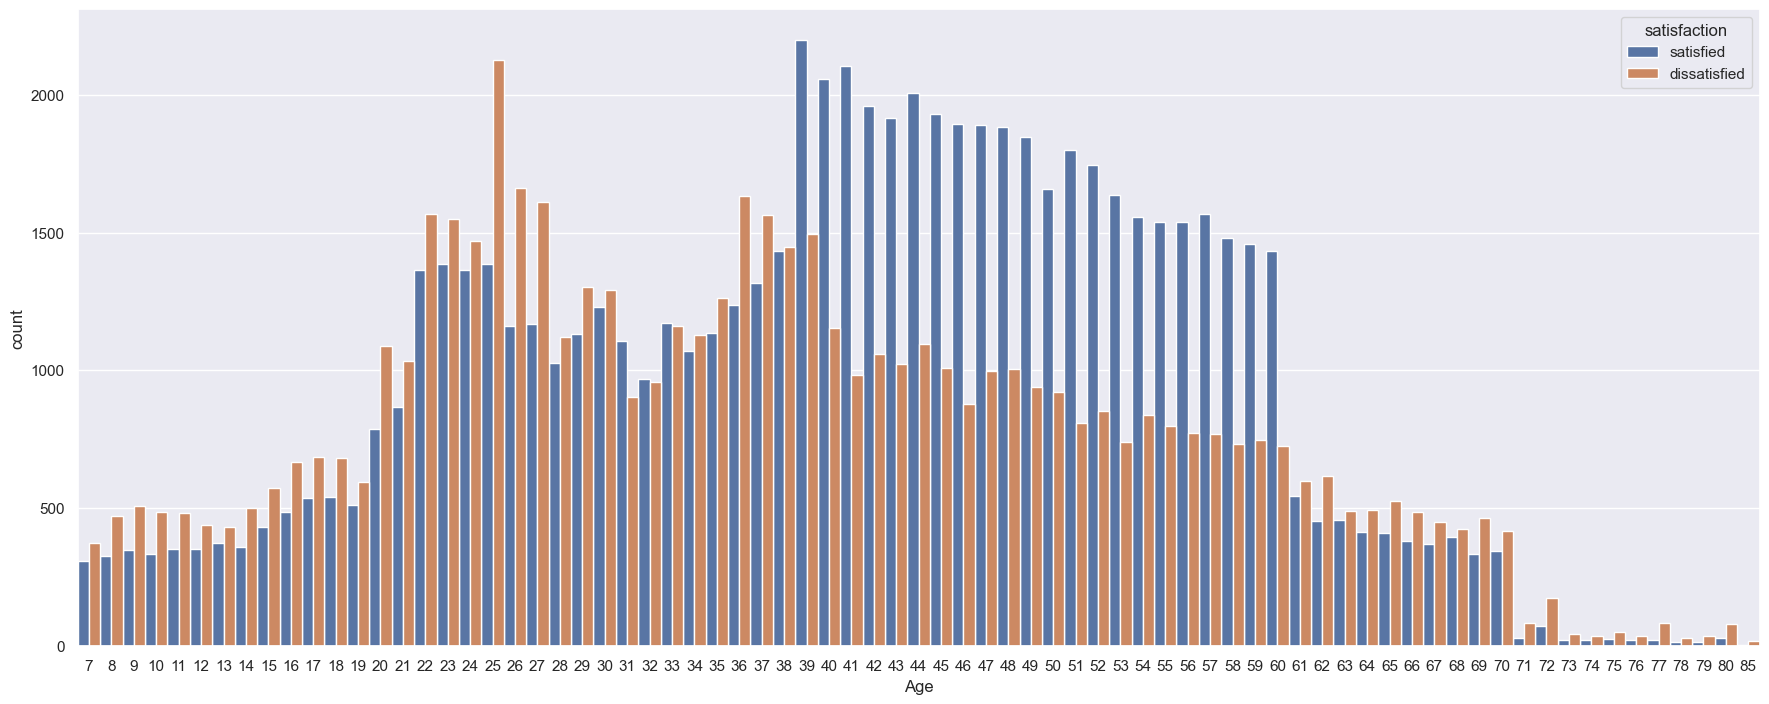

In [101]:
# Satisfied and dissatisfied customer based on age
sns.set(rc={'figure.figsize':(21.7,8.27)})
sns.countplot(dta, x='Age', hue ='satisfaction',width=1)
# may need grouping instead to get a better picture? Maybe by 5? 

<AxesSubplot:xlabel='Type of Travel', ylabel='count'>

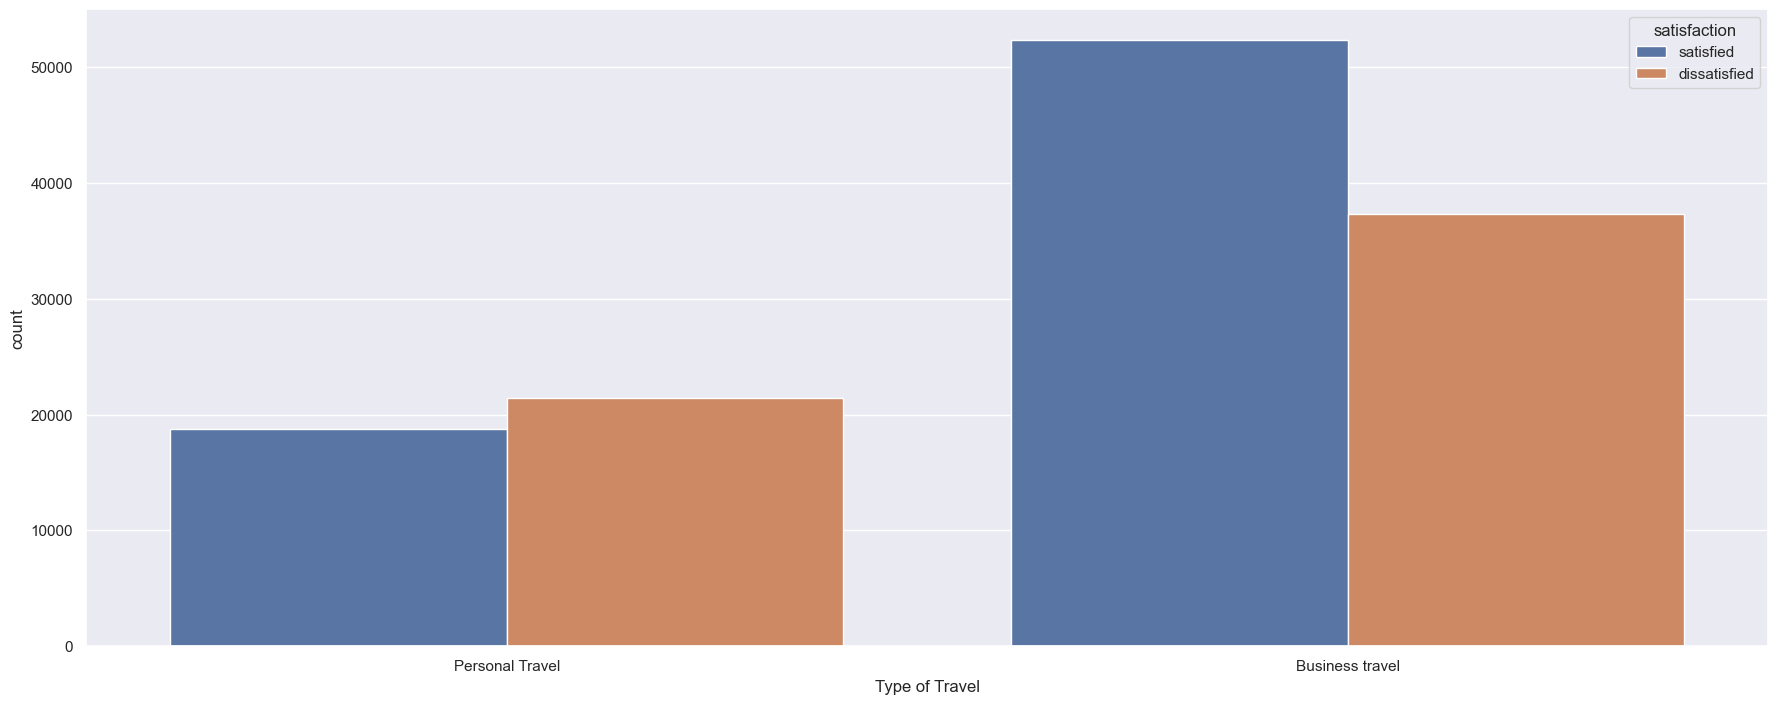

In [102]:
# Ease of Online booking score between personal and business travellers 
sns.countplot(dta, x='Type of Travel', hue ='satisfaction')

<AxesSubplot:xlabel='Online boarding', ylabel='Age'>

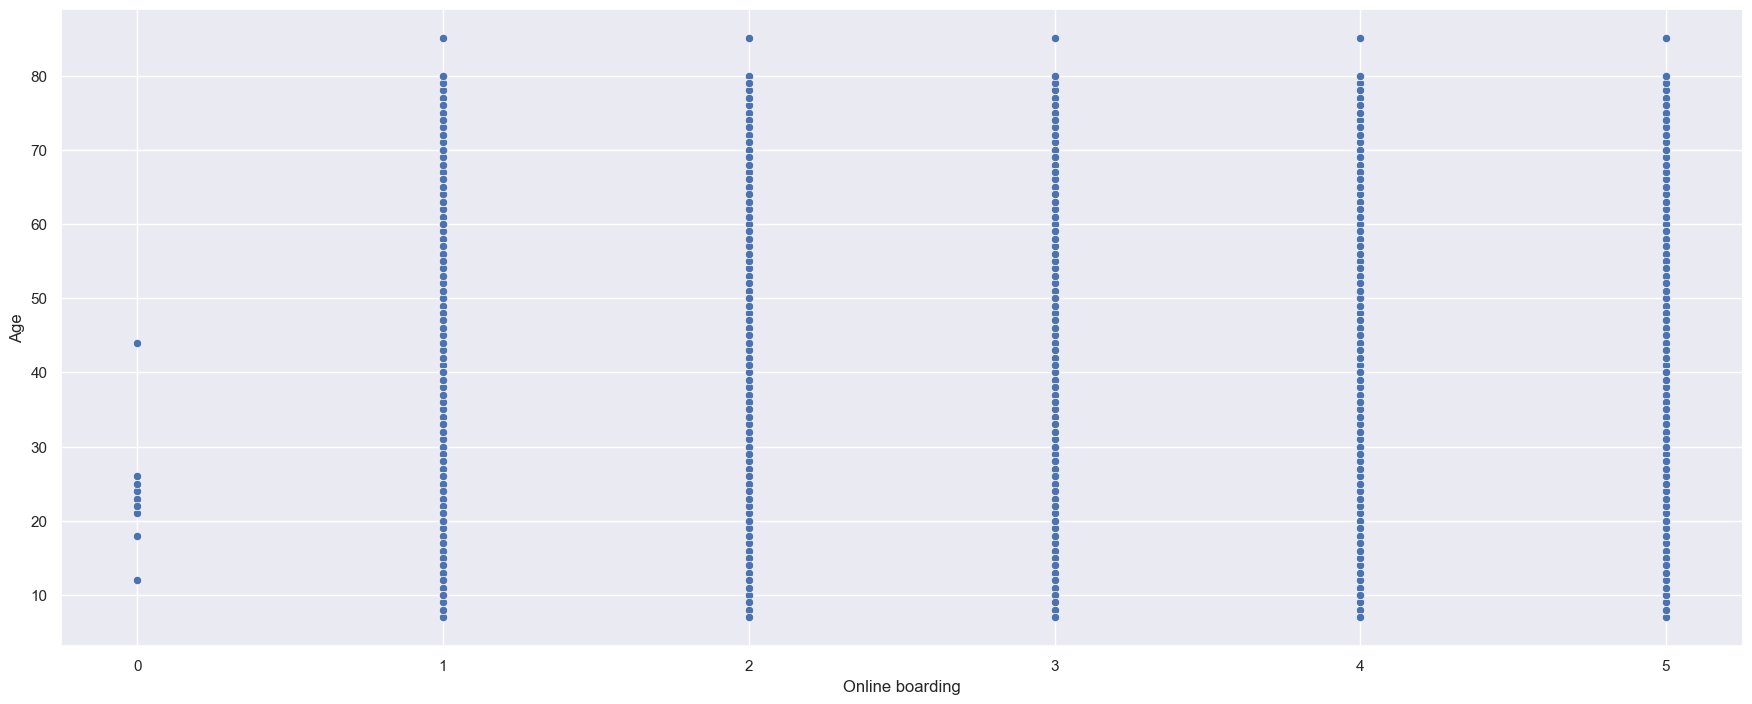

In [103]:
# Online boarding scores based on age
sns.scatterplot(dta, x='Online boarding', y ='Age')

<AxesSubplot:xlabel='Online boarding', ylabel='count'>

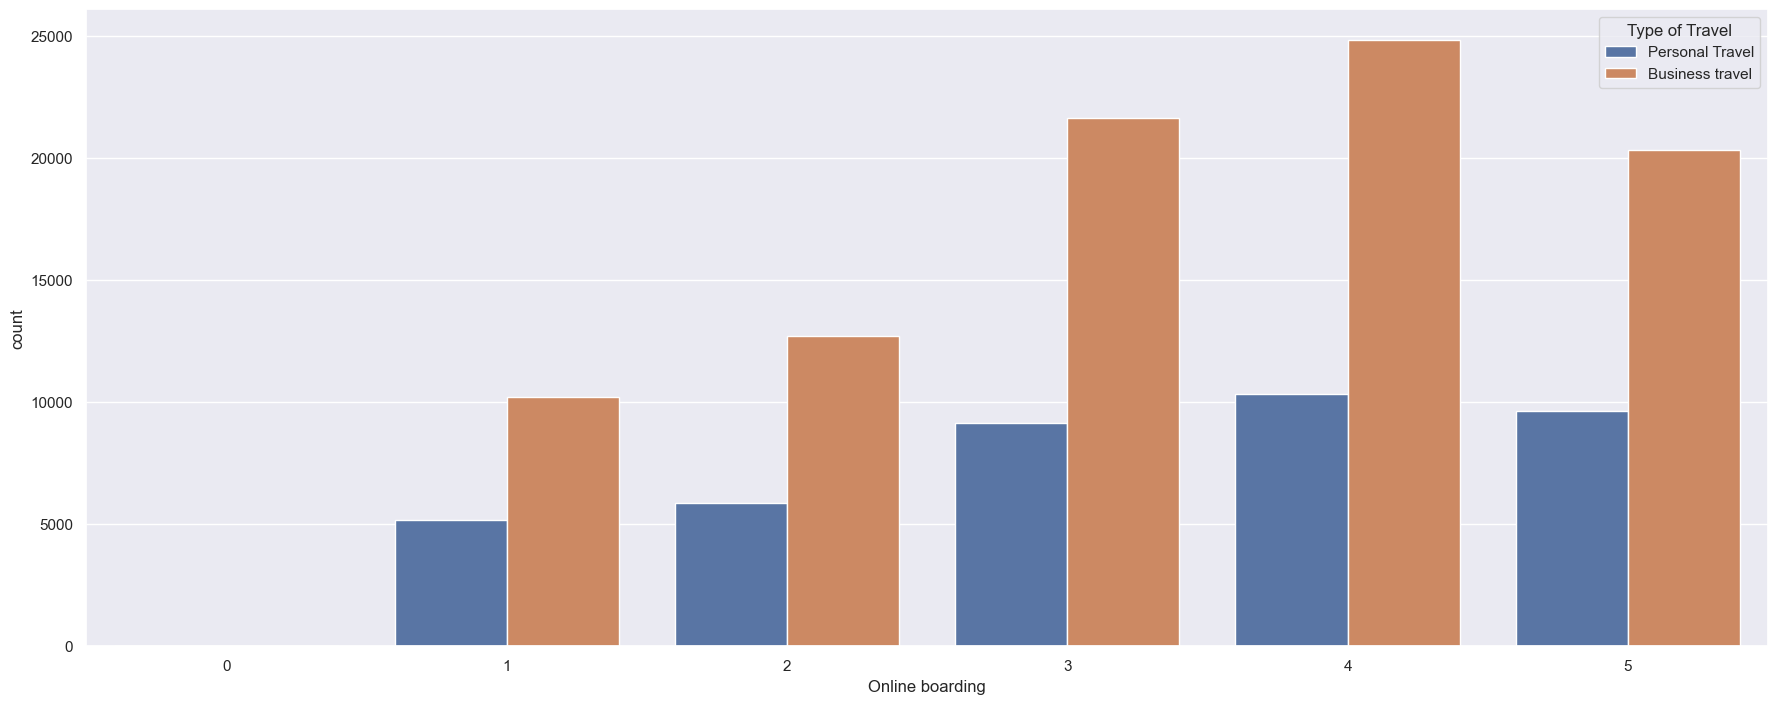

In [104]:
# Online boarding scores between personal and business travellers 
sns.countplot(dta, x='Online boarding', hue ='Type of Travel')

<AxesSubplot:xlabel='Online support', ylabel='Age'>

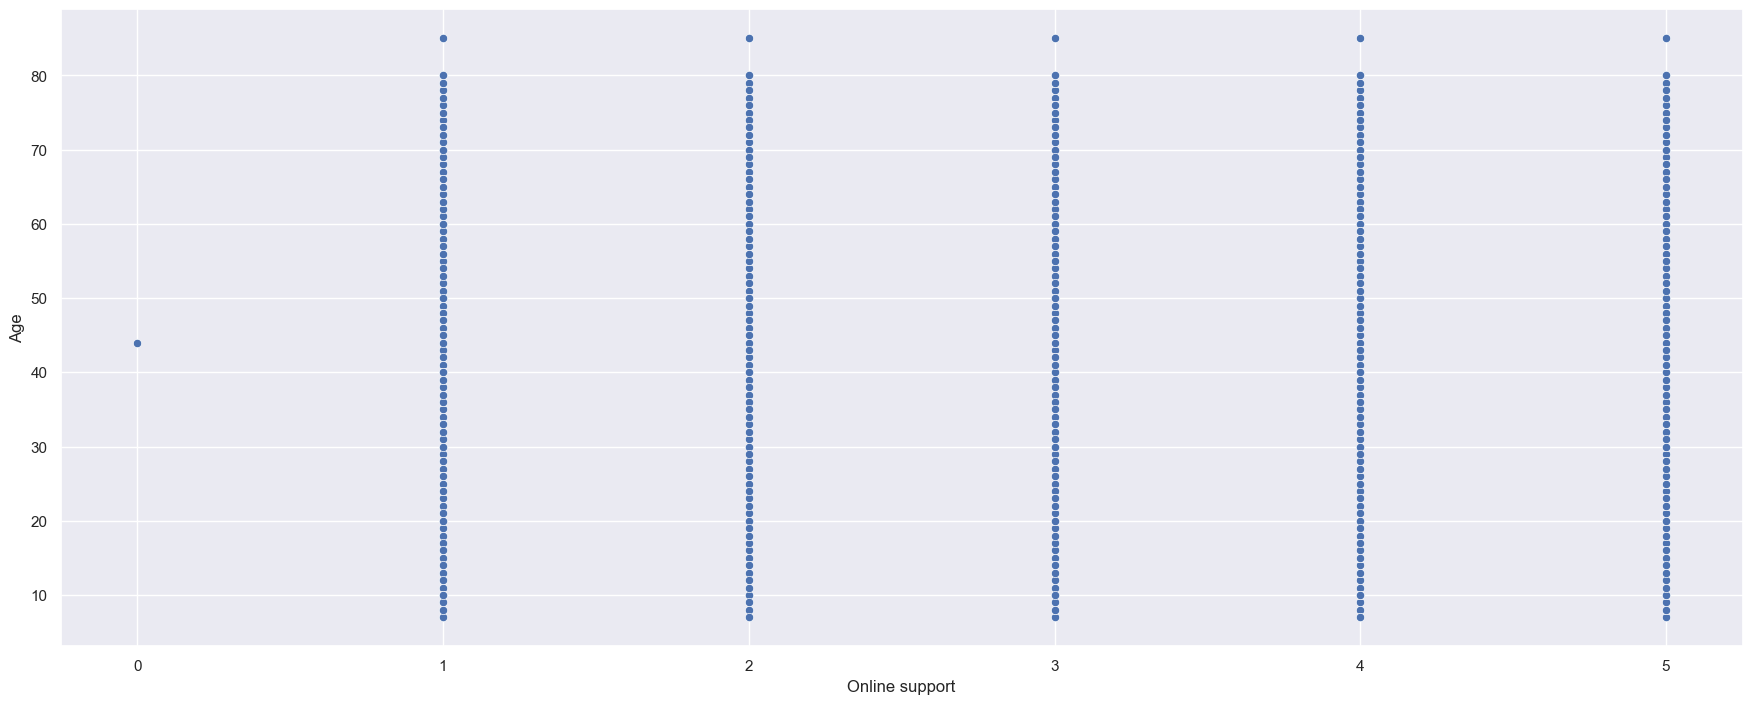

In [105]:
# Online support scores based on age
sns.scatterplot(dta, x='Online support', y ='Age')

# Not much difference or no pattern shown with age. 

<AxesSubplot:xlabel='Online support', ylabel='count'>

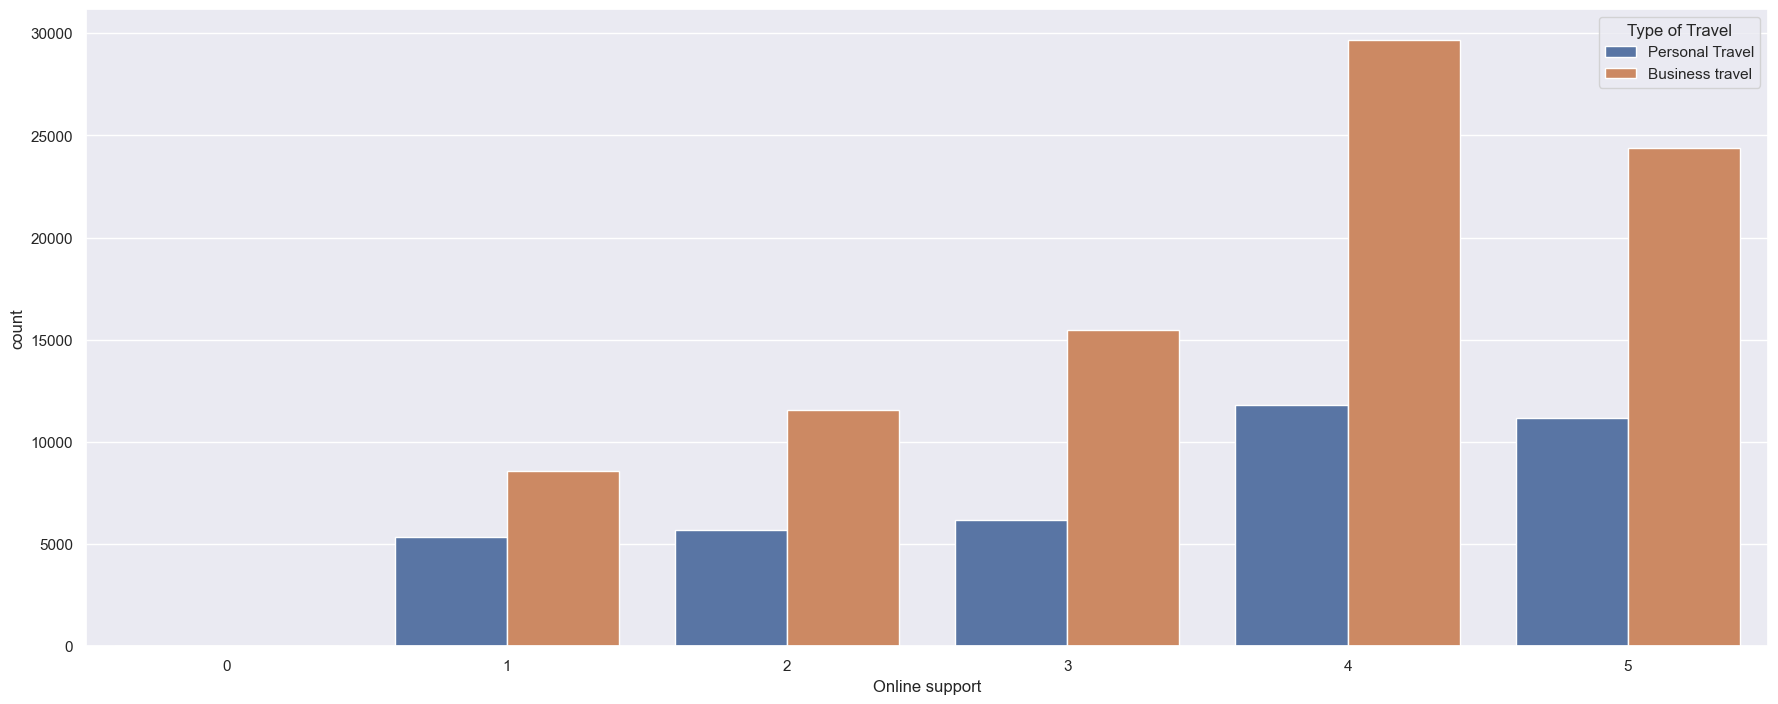

In [106]:
# Online support scores between personal and business travellers 
sns.countplot(dta, x='Online support', hue ='Type of Travel')

# Data Analysis Pipeline

Step 1: Load Data

In [107]:
df = pd.read_csv("../data/raw/Invistico_Airline.csv")
df

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,satisfied,Female,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,...,2,2,3,3,4,4,4,2,0,0.0
129876,dissatisfied,Male,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,...,1,3,2,3,3,1,2,1,174,172.0
129877,dissatisfied,Male,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,...,2,4,4,3,4,2,3,2,155,163.0
129878,dissatisfied,Male,disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,...,2,3,3,2,3,2,1,2,193,205.0


Step 2: Clean Data

In [108]:
df = (df.drop(['Gender','Customer Type','Class','Flight Distance','Seat comfort','Departure/Arrival time convenient',
                 'Food and drink','On-board service','Leg room service','Baggage handling','Checkin service','Cleanliness',
                 'Gate location','Inflight wifi service','Inflight entertainment',
                 'Departure Delay in Minutes','Arrival Delay in Minutes'], axis=1)
        .dropna(subset = ['Age','satisfaction','Ease of Online booking','Online boarding', 'Online support', 'Type of Travel'])
        .reset_index(drop =True))

df

,satisfaction,Age,Type of Travel,Online support,Ease of Online booking,Online boarding
0,satisfied,65,Personal Travel,2,3,2
1,satisfied,47,Personal Travel,2,3,2
2,satisfied,15,Personal Travel,2,2,2
3,satisfied,60,Personal Travel,3,1,3
4,satisfied,70,Personal Travel,4,2,5
...,...,...,...,...,...,...
129875,satisfied,29,Personal Travel,2,2,2
129876,dissatisfied,63,Personal Travel,1,3,1
129877,dissatisfied,69,Personal Travel,2,4,2
129878,dissatisfied,66,Personal Travel,2,3,2


Step 3 & 4: Data Processing & Wrangling

In [109]:
df= df.assign(Age=pd.cut(df['Age'], bins=[0, 19, 29, 39, 49, 59, 69, float('inf')], 
                           labels=['<19', '20-29', '30-39', '40-49', '50-59', '60-69', '70+']))\
[['Age', 'Type of Travel', 'satisfaction', 'Ease of Online booking', 'Online boarding', 'Online support']]\
.dropna().reset_index(drop=True)
df

,Age,Type of Travel,satisfaction,Ease of Online booking,Online boarding,Online support
0,60-69,Personal Travel,satisfied,3,2,2
1,40-49,Personal Travel,satisfied,3,2,2
2,<19,Personal Travel,satisfied,2,2,2
3,60-69,Personal Travel,satisfied,1,3,3
4,70+,Personal Travel,satisfied,2,5,4
...,...,...,...,...,...,...
129875,20-29,Personal Travel,satisfied,2,2,2
129876,60-69,Personal Travel,dissatisfied,3,1,1
129877,60-69,Personal Travel,dissatisfied,4,2,2
129878,60-69,Personal Travel,dissatisfied,3,2,2


# Method Chaining 

Building Method Chain

In [137]:
df1 = (pd.read_csv("../data/raw/Invistico_Airline.csv")
       .dropna(subset=['Age','satisfaction',
                       'Ease of Online booking','Online boarding','Online support','Type of Travel'])
       .drop(['Gender','Customer Type','Class','Flight Distance','Seat comfort',
              'Departure/Arrival time convenient', 'Food and drink','On-board service',
              'Leg room service','Baggage handling','Checkin service','Cleanliness',
              'Gate location','Inflight wifi service','Inflight entertainment',
              'Departure Delay in Minutes','Arrival Delay in Minutes'], axis=1))
df1 = (df1
       .assign(Age=pd.cut(df1['Age'], bins=[0, 19, 29, 39, 49, 59, 69, 100], 
                          labels=['<19', '20-29', '30-39', '40-49', '50-59', '60-69', '70+']))
       [['Age', 'Type of Travel', 'satisfaction', 
         'Ease of Online booking', 'Online boarding', 'Online support']]
       .dropna().reset_index(drop=True))
df1

,Age,Type of Travel,satisfaction,Ease of Online booking,Online boarding,Online support
0,60-69,Personal Travel,satisfied,3,2,2
1,40-49,Personal Travel,satisfied,3,2,2
2,<19,Personal Travel,satisfied,2,2,2
3,60-69,Personal Travel,satisfied,1,3,3
4,70+,Personal Travel,satisfied,2,5,4
...,...,...,...,...,...,...
129875,20-29,Personal Travel,satisfied,2,2,2
129876,60-69,Personal Travel,dissatisfied,3,1,1
129877,60-69,Personal Travel,dissatisfied,4,2,2
129878,60-69,Personal Travel,dissatisfied,3,2,2


Wraping Method Chain in a Function

In [138]:
def load_and_process(file_path="../../data/raw/Invistico_Airline.csv"):
    # Load and Clean Data
    df1 = (pd.read_csv(file_path)
           .dropna(subset=['Age', 'satisfaction',
                           'Ease of Online booking', 'Online boarding', 'Online support', 'Type of Travel'])
           .drop(['Gender', 'Customer Type', 'Class', 'Flight Distance', 'Seat comfort',
                  'Departure/Arrival time convenient', 'Food and drink','On-board service',
                  'Leg room service', 'Baggage handling', 'Checkin service', 'Cleanliness',
                  'Gate location', 'Inflight wifi service', 'Inflight entertainment', 
                  'Departure Delay in Minutes', 'Arrival Delay in Minutes'], axis=1))
    # Process and Wrangle Data
    df2 = (df1.assign(Age=pd.cut(df1['Age'], bins=[0, 19, 29, 39, 49, 59, 69, 100], 
                          labels=['<19', '20-29', '30-39', '40-49', '50-59', '60-69', '70+']))
       [['Age', 'Type of Travel', 'satisfaction', 
         'Ease of Online booking', 'Online boarding', 'Online support']]
       .dropna().reset_index(drop=True))
    return df2

In [112]:
load_and_process("../data/raw/Invistico_Airline.csv")

,Age,Type of Travel,satisfaction,Ease of Online booking,Online boarding,Online support
0,60-69,Personal Travel,satisfied,3,2,2
1,40-49,Personal Travel,satisfied,3,2,2
2,<19,Personal Travel,satisfied,2,2,2
3,60-69,Personal Travel,satisfied,1,3,3
4,70+,Personal Travel,satisfied,2,5,4
...,...,...,...,...,...,...
129875,20-29,Personal Travel,satisfied,2,2,2
129876,60-69,Personal Travel,dissatisfied,3,1,1
129877,60-69,Personal Travel,dissatisfied,4,2,2
129878,60-69,Personal Travel,dissatisfied,3,2,2


In [133]:
import sys

import project_functions1 as dfz

dfz.load_and_process("../data/raw/Invistico_Airline.csv")

,Age,Type of Travel,satisfaction,Ease of Online booking,Online boarding,Online support
0,60-69,Personal Travel,satisfied,3,2,2
1,40-49,Personal Travel,satisfied,3,2,2
2,0-19,Personal Travel,satisfied,2,2,2
3,60-69,Personal Travel,satisfied,1,3,3
4,70+,Personal Travel,satisfied,2,5,4
...,...,...,...,...,...,...
129875,20-29,Personal Travel,satisfied,2,2,2
129876,60-69,Personal Travel,dissatisfied,3,1,1
129877,60-69,Personal Travel,dissatisfied,4,2,2
129878,60-69,Personal Travel,dissatisfied,3,2,2
